# Korrelationskoeffizient FS Features Ergebnisse

## Code

In [1]:
import pandas as pd
import numpy as np

from src import plot

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

In [2]:
df_metris = pd.read_csv("data/Corr/20_Corr_metrics.csv")
df_metris.set_index('Model_name', inplace=True)
results_metrics = df_metris.to_dict(orient="index")


restored_df = pd.read_csv('data/Corr/20_Corr_predictions.csv')
restored_predictions = {}

# Iteriere über die einzigartigen Modellnamen im DataFrame
for model_name in restored_df['Model_name'].unique():
    model_data = {}
    model_df = restored_df[restored_df['Model_name'] == model_name]
    # Iteriere über die einzigartigen Datentypen im Modell
    for data_type in model_df['Data_type'].unique():
        values = model_df[model_df['Data_type'] == data_type]['Value'].values
        # Füge die Werte zum Modelldaten-Dictionary hinzu
        model_data[data_type] = values
    # Füge das Modelldaten-Dictionary zum Hauptdictionary hinzu
    restored_predictions[model_name] = model_data
results_pred = {model_name: {**{'Model_name': model_name}, **model_data} for model_name, model_data in restored_predictions.items()}

evaluation = ['train', 'cv_train', 'cv_test', 'test']

MLA = [
    ('Linear Regressor',LinearRegression()),
    ('SVR', SVR(kernel='linear')),
    ('Random Forest',RandomForestRegressor()),
    ('Gradient Boosting', xgb.XGBRegressor())
]

selection_methode = "Corr"

### Metriken vs. Feature Anzahl


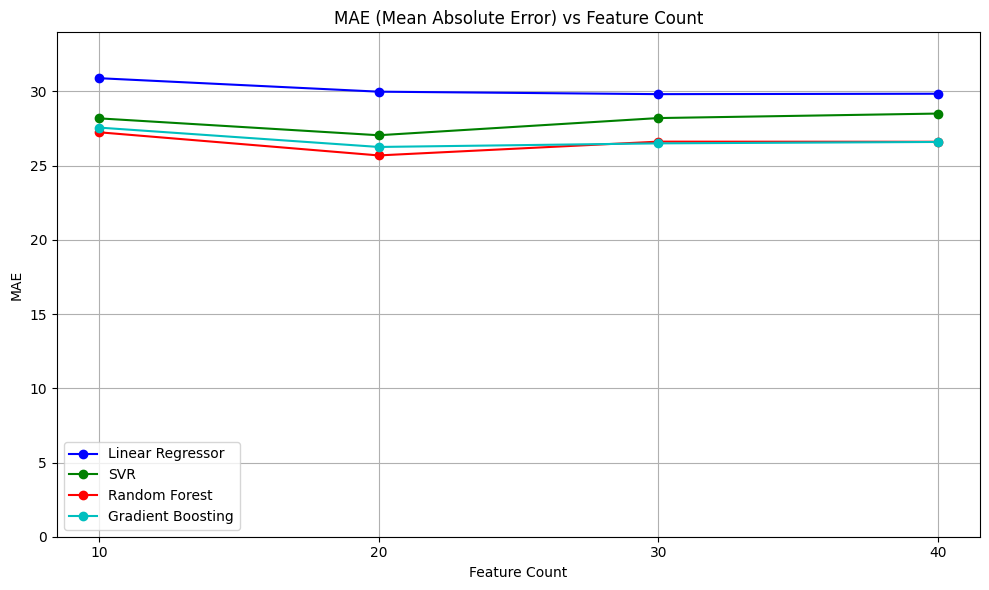

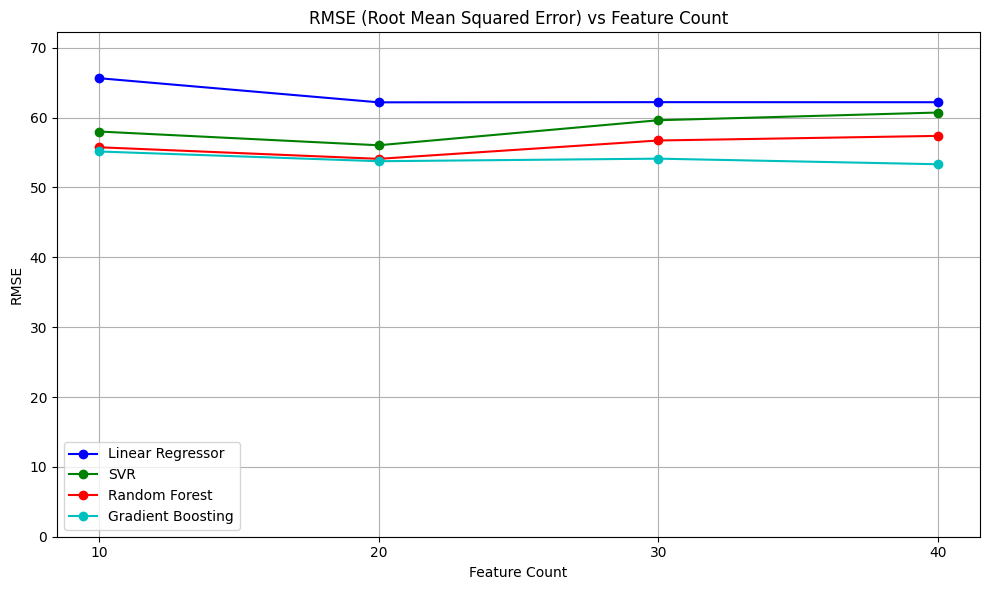

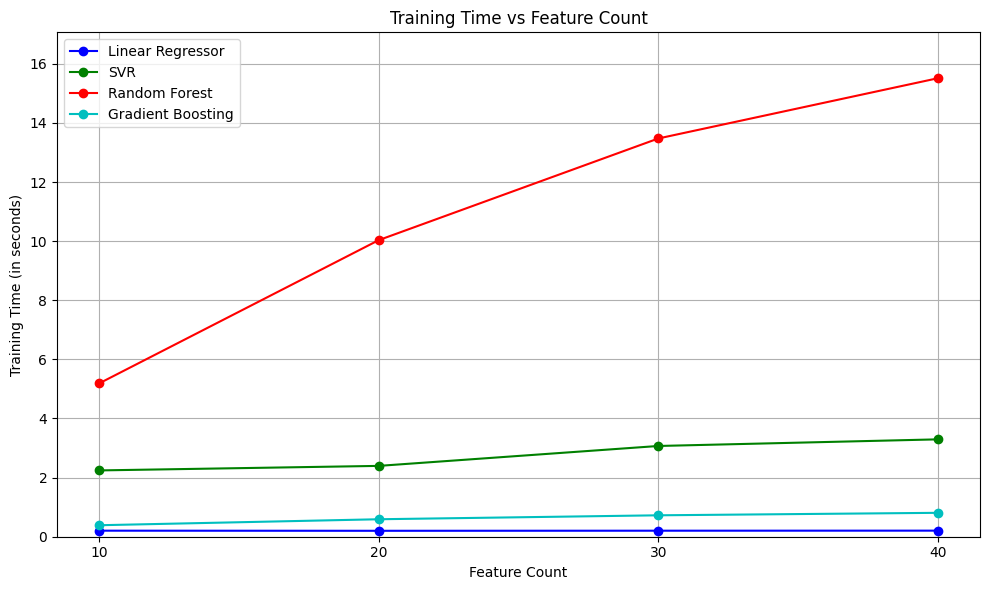

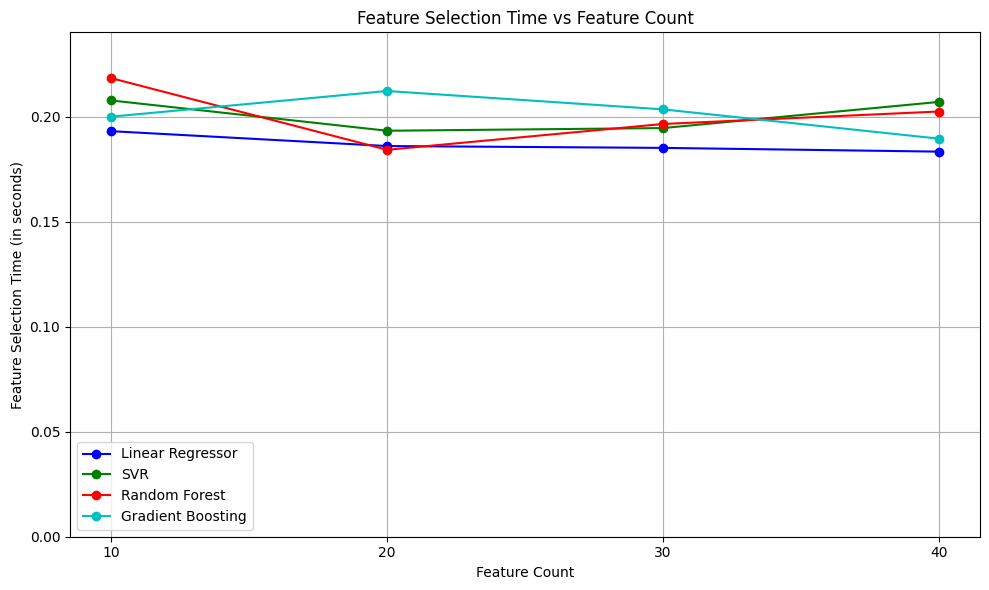

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Verzeichnis mit den gespeicherten Ergebnissen
output_dir = "data/Corr/"
save_path = "plots/Corr"

# Sicherstellen, dass der Ordner existiert, andernfalls erstellen
os.makedirs(save_path, exist_ok=True)

# Modellnamen und Farben für den Plot
models = ['Linear Regressor', 'SVR', 'Random Forest', 'Gradient Boosting']
colors = ['b', 'g', 'r', 'c']  # Farben für Modelle

# Listen, um die Metriken zu speichern
mae_values = {model: [] for model in models}
rmse_values = {model: [] for model in models}
train_time_values = {model: [] for model in models}  # Liste für Laufzeit
fs_time_values = {model: [] for model in models}  # Liste für Feature Selection Laufzeit
feature_counts = [10, 20, 30, 40]

# Iteriere über jede Feature-Anzahl und extrahiere die Metriken aus den CSV-Dateien
for num_features in feature_counts:
    # Pfad zur Metrik-Datei
    metrics_file = f'{output_dir}{num_features}_Corr_metrics.csv'
    
    # Lese die Metriken ein
    df_metrics = pd.read_csv(metrics_file)
    
    # Extrahiere die MAE, RMSE, Laufzeit und Feature Selection Laufzeit Werte für jedes Modell
    for model in models:
        mae_values[model].append(df_metrics.loc[df_metrics['Model_name'] == model, 'TestMAE'].values[0])
        rmse_values[model].append(df_metrics.loc[df_metrics['Model_name'] == model, 'TestRMSE'].values[0])
        train_time_values[model].append(df_metrics.loc[df_metrics['Model_name'] == model, 'TrainTime_ges'].values[0])  # Laufzeit
        fs_time_values[model].append(df_metrics.loc[df_metrics['Model_name'] == model, 'FS-Laufzeit'].values[0])  # FS Laufzeit

# Berechne den maximalen Wert für die Metriken MAE, RMSE, Laufzeit und FS Laufzeit, um die y-Achse dynamisch anzupassen
max_mae = max(max(mae_values[model]) for model in models)
max_rmse = max(max(rmse_values[model]) for model in models)
max_train_time = max(max(train_time_values[model]) for model in models)
max_fs_time = max(max(fs_time_values[model]) for model in models)

# Plot MAE
plt.figure(figsize=(10, 6))
for model, color in zip(models, colors):
    plt.plot(feature_counts, mae_values[model], label=model, color=color, marker='o')

# Achsen und Titel setzen
plt.title('MAE (Mean Absolute Error) vs Feature Count')
plt.xlabel('Feature Count')
plt.ylabel('MAE')
plt.xticks(feature_counts)
plt.ylim(0, max_mae * 1.1)  # Setze die y-Achse bei 0, mit etwas Platz über dem höchsten Wert
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'mae_vs_feature_count.png'))
plt.show()

# Plot RMSE
plt.figure(figsize=(10, 6))
for model, color in zip(models, colors):
    plt.plot(feature_counts, rmse_values[model], label=model, color=color, marker='o')

# Achsen und Titel setzen
plt.title('RMSE (Root Mean Squared Error) vs Feature Count')
plt.xlabel('Feature Count')
plt.ylabel('RMSE')
plt.xticks(feature_counts)
plt.ylim(0, max_rmse * 1.1)  # Setze die y-Achse bei 0, mit etwas Platz über dem höchsten Wert
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'rmse_vs_feature_count.png'))
plt.show()

# Plot Laufzeit
plt.figure(figsize=(10, 6))
for model, color in zip(models, colors):
    plt.plot(feature_counts, train_time_values[model], label=model, color=color, marker='o')

# Achsen und Titel setzen
plt.title('Training Time vs Feature Count')
plt.xlabel('Feature Count')
plt.ylabel('Training Time (in seconds)')
plt.xticks(feature_counts)
plt.ylim(0, max_train_time * 1.1)  # Setze die y-Achse bei 0, mit etwas Platz über dem höchsten Wert
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'train_time_vs_feature_count.png'))
plt.show()

# Plot Feature Selection Laufzeit
plt.figure(figsize=(10, 6))
for model, color in zip(models, colors):
    plt.plot(feature_counts, fs_time_values[model], label=model, color=color, marker='o')

# Achsen und Titel setzen
plt.title('Feature Selection Time vs Feature Count')
plt.xlabel('Feature Count')
plt.ylabel('Feature Selection Time (in seconds)')
plt.xticks(feature_counts)
plt.ylim(0, max_fs_time * 1.1)  # Setze die y-Achse bei 0, mit etwas Platz über dem höchsten Wert
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'fs_time_vs_feature_count.png'))
plt.show()

## Scatterplots Predictions

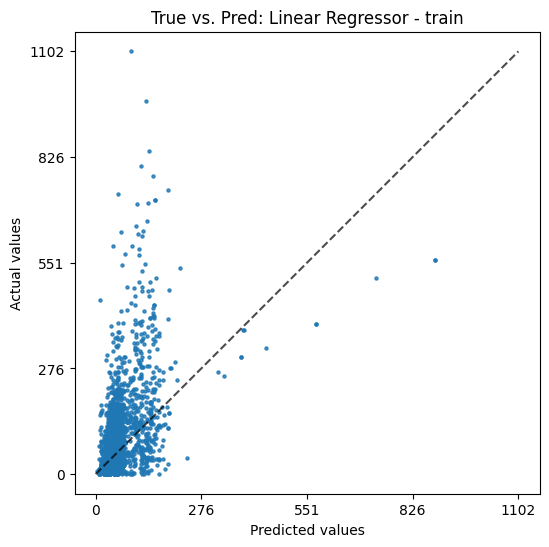

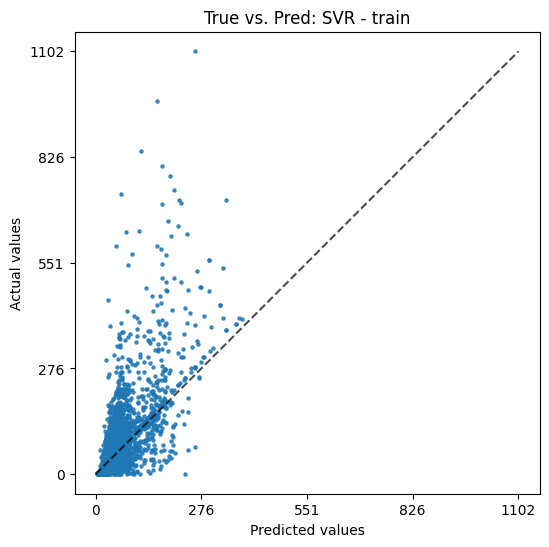

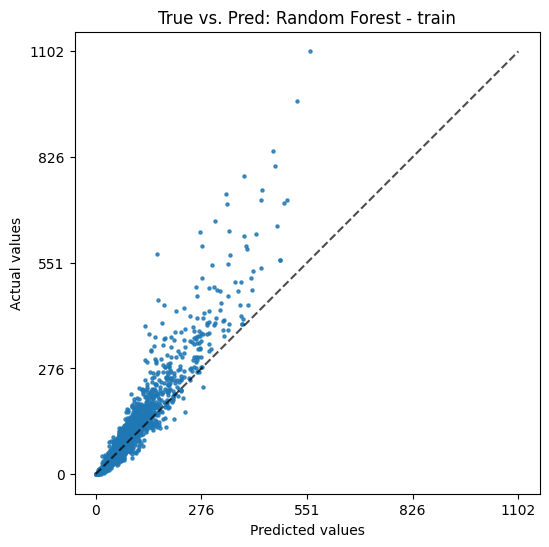

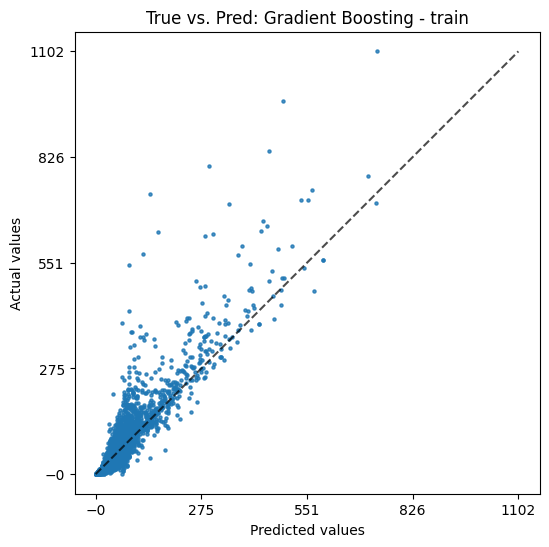

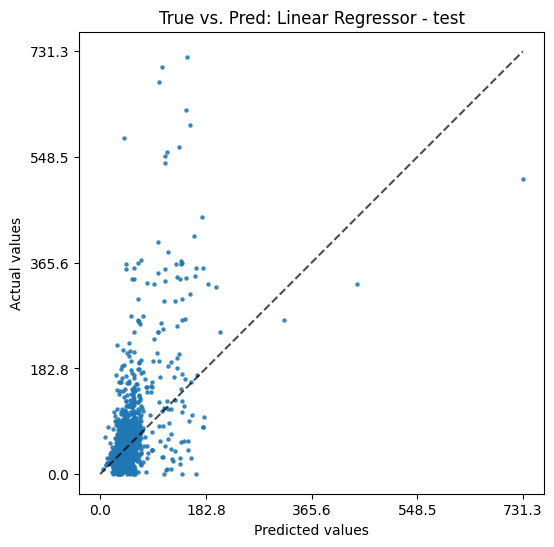

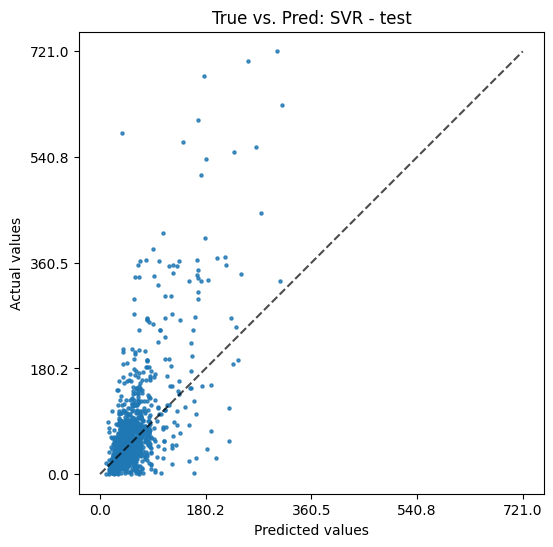

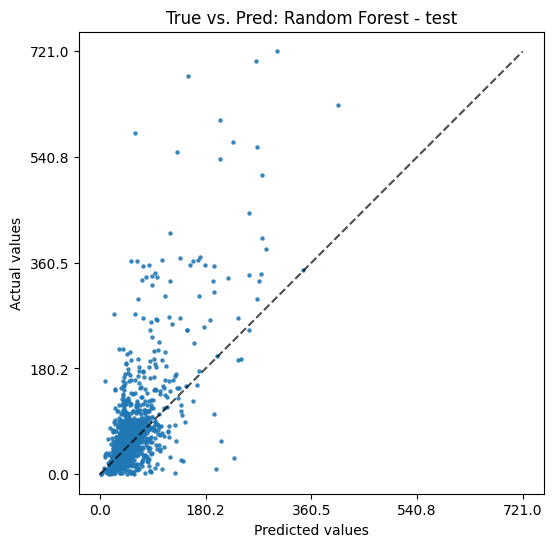

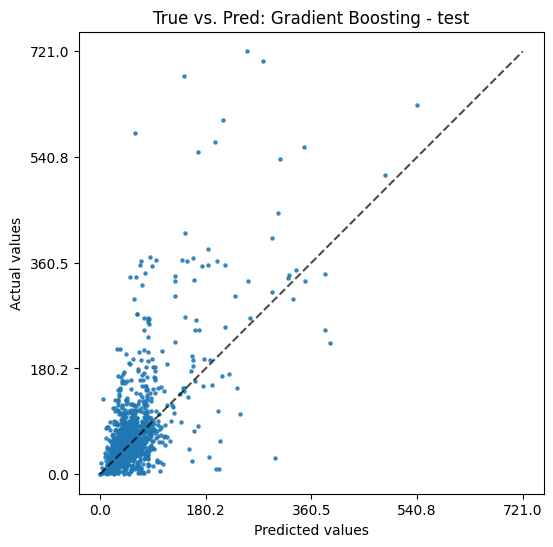

In [3]:
for item in evaluation:
    for model_name, model_instance in MLA:
        plot.predicitons_scatter(selection_methode, results_pred[model_name], evaluation=item,name="All_FS_corr")

## Histogramm Residuen

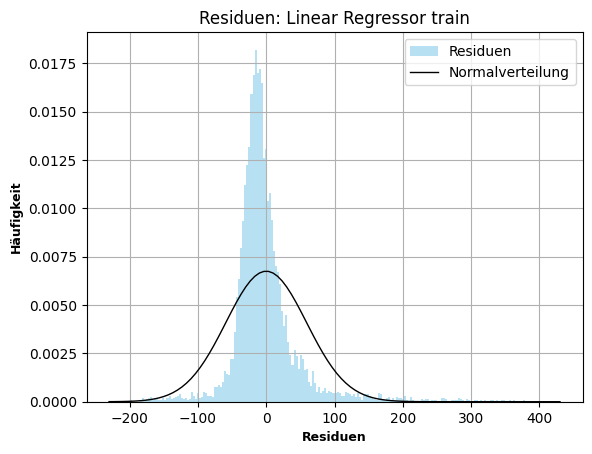

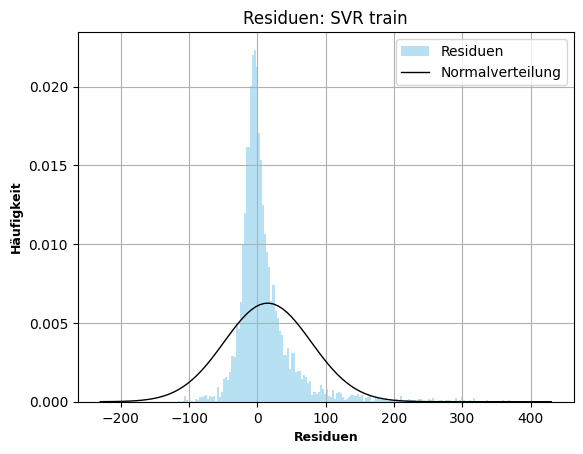

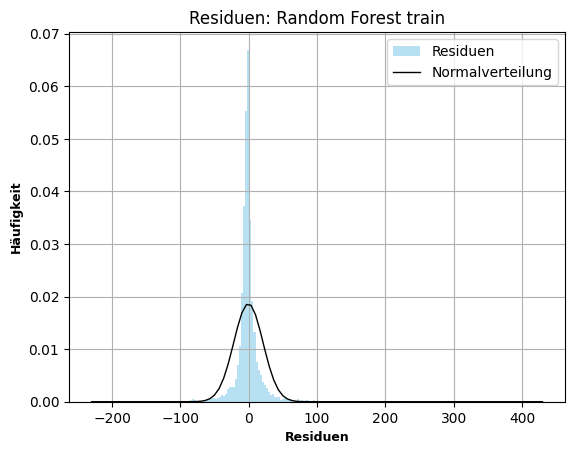

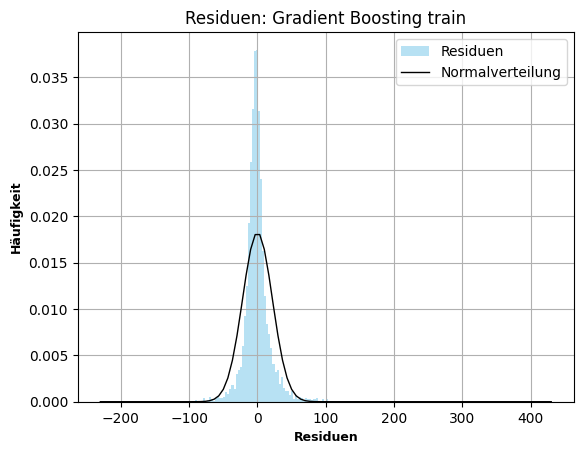

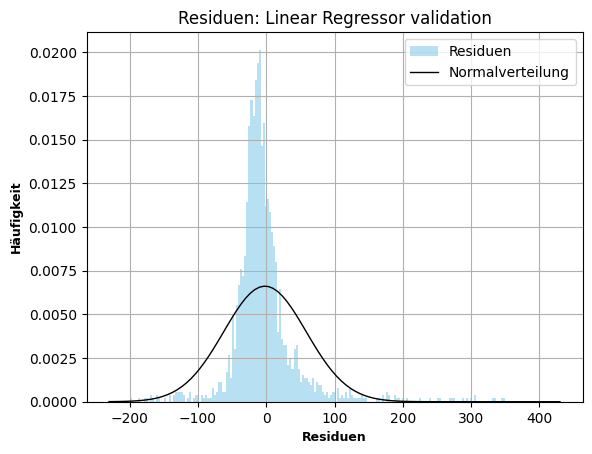

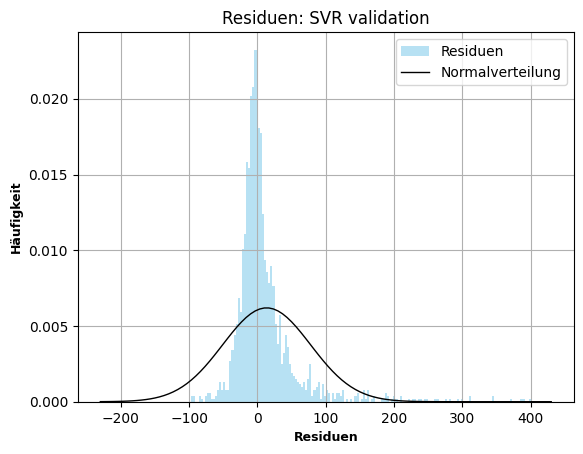

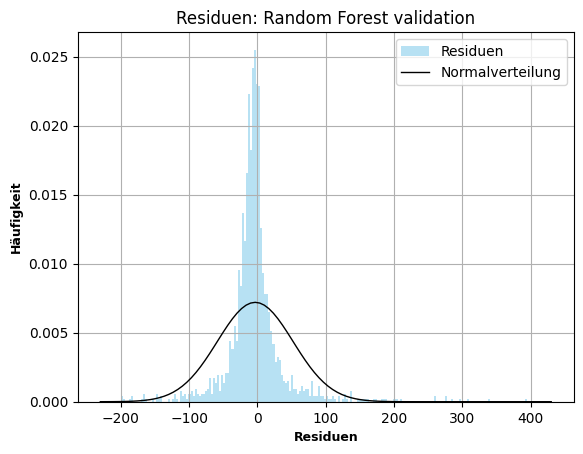

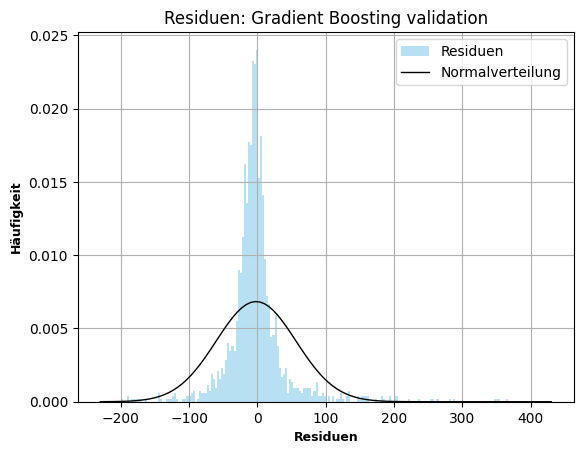

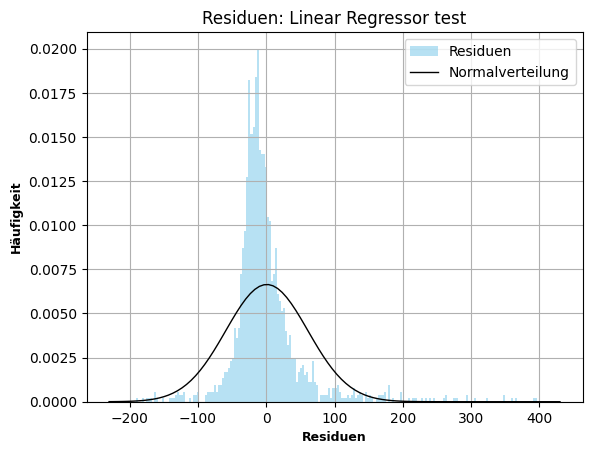

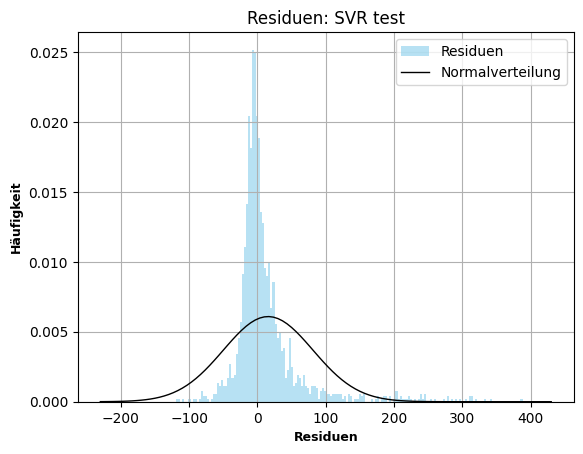

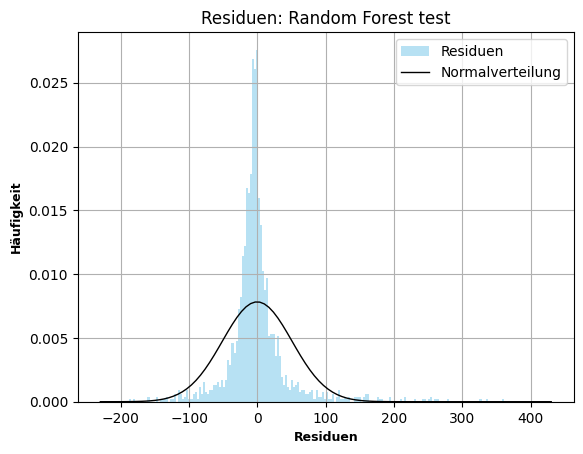

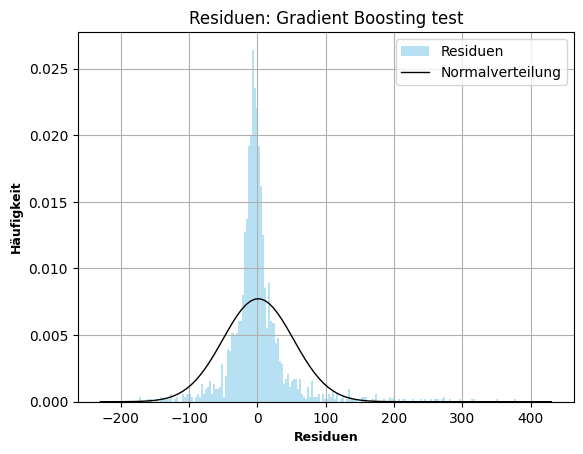

In [4]:
for item in evaluation:
    for model_name, model_instance in MLA:
        plot.residuen_histo(results_pred[model_name], evaluation=item, name="All_FS_corr", range_min=-200, range_max=400)

## Barplots Metrics

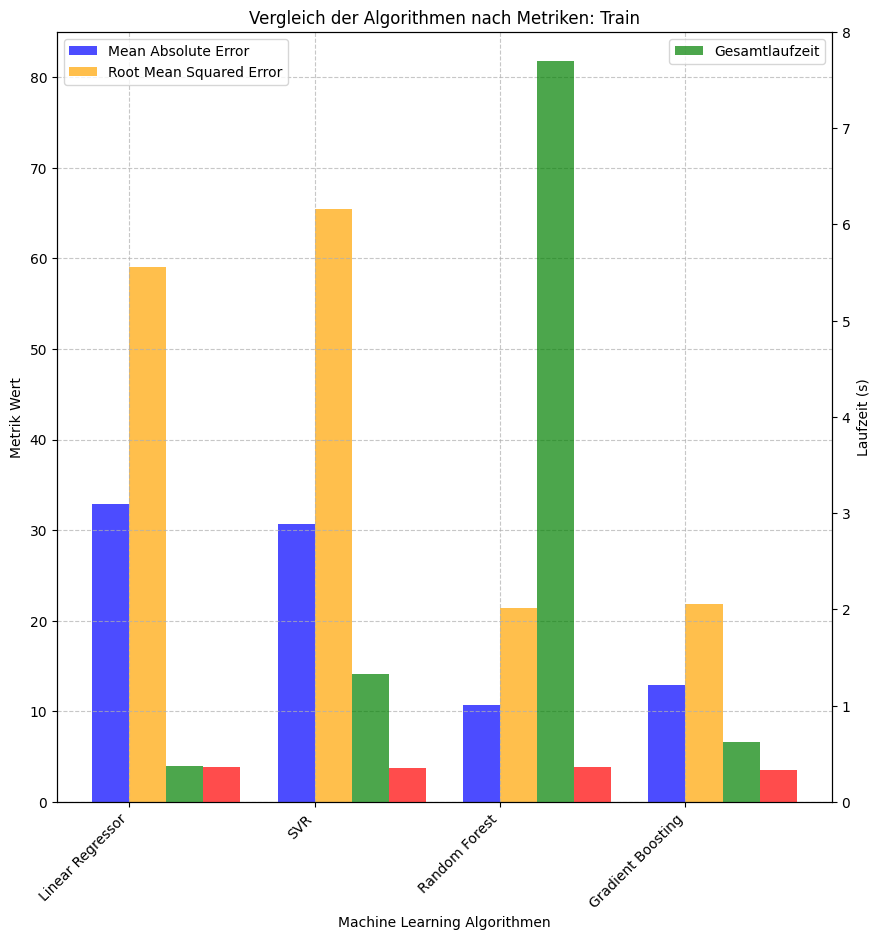

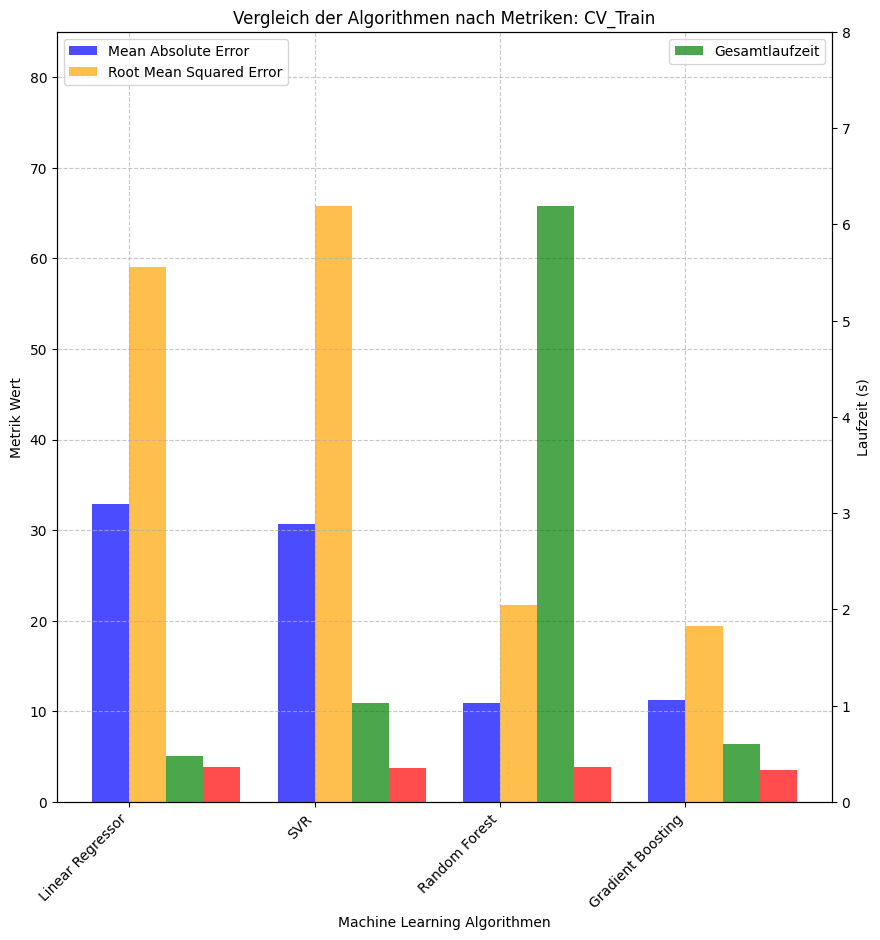

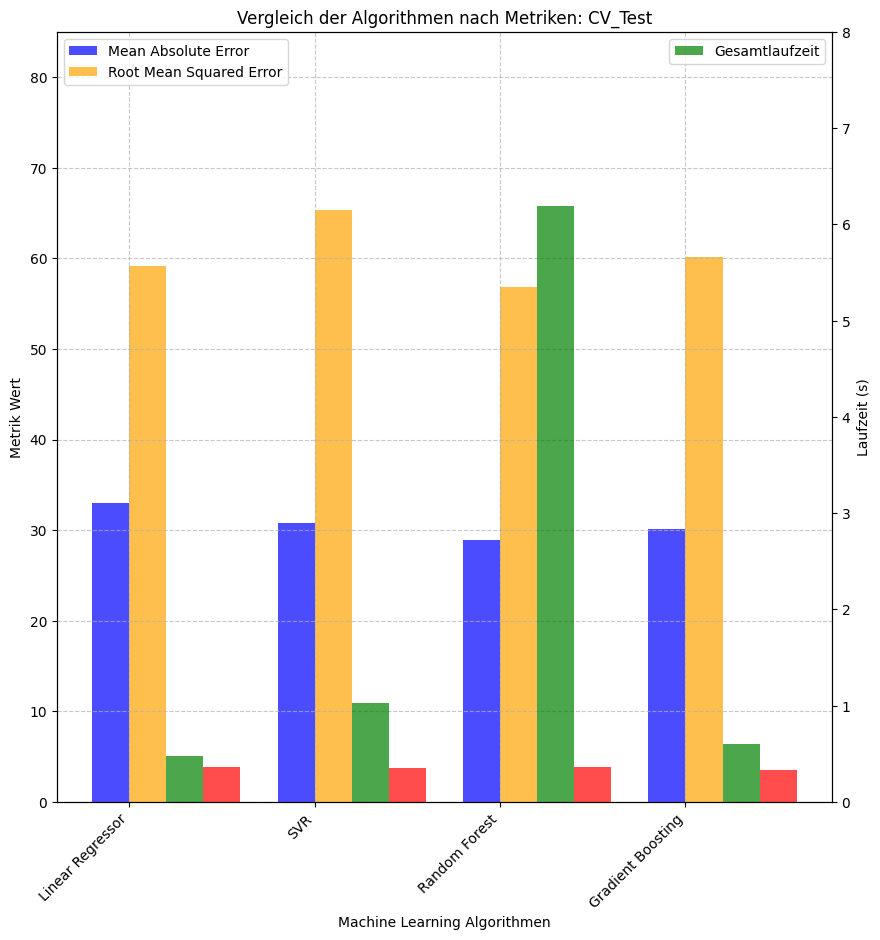

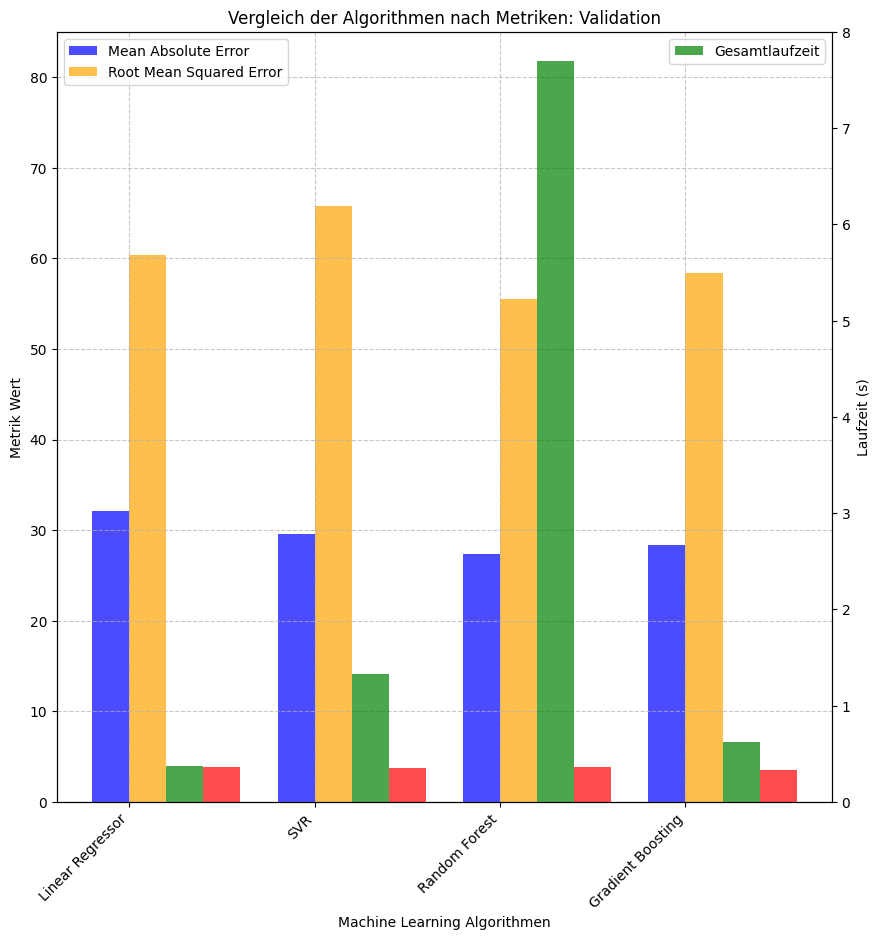

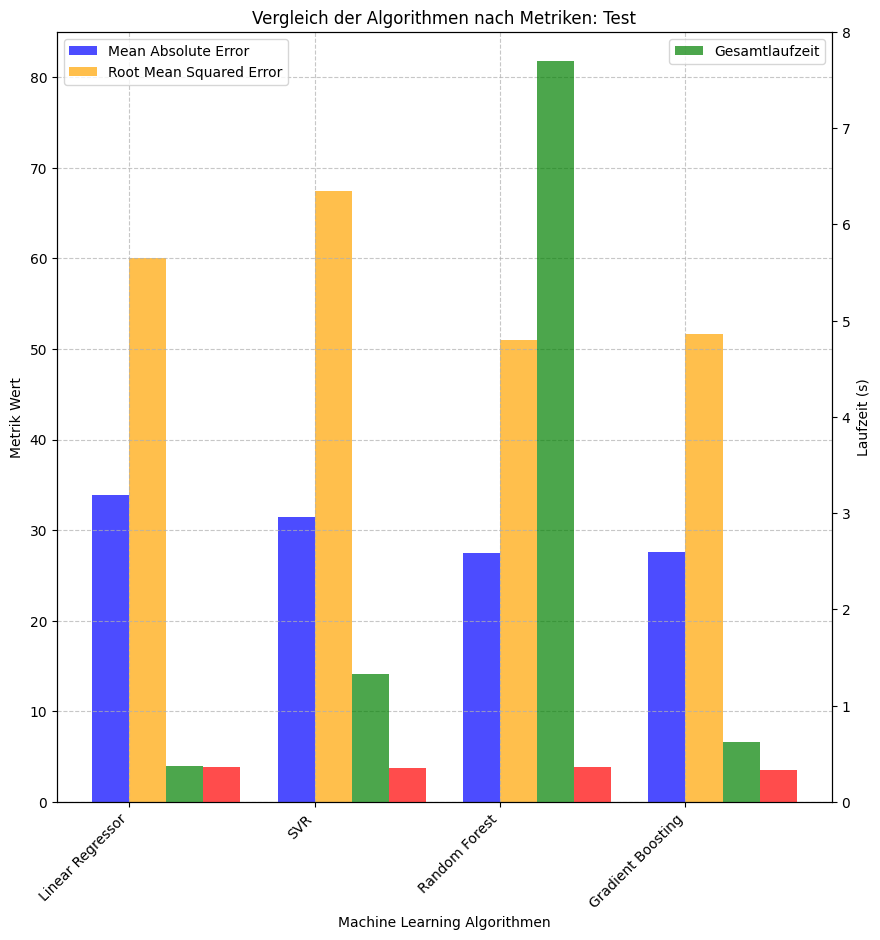

In [15]:
for item in evaluation:
    plot.model_results_barplot(results_metrics, metrics_upper_limit=85, runtime_upper_limit=8, plot_runtime=True, evaluation=item,name="All_FS_corr",FS=True)

# RFE FS Features Ergebnisse

## Code

In [6]:
import pandas as pd
import numpy as np

import plot

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

In [7]:
df_metris = pd.read_csv("data/RFE/All_FS_rfe_metrics.csv")
df_metris.set_index('Model_name', inplace=True)
results_metrics = df_metris.to_dict(orient="index")


restored_df = pd.read_csv('data/RFE/All_FS_rfe_predictions.csv')
restored_predictions = {}

# Iteriere über die einzigartigen Modellnamen im DataFrame
for model_name in restored_df['Model_name'].unique():
    model_data = {}
    model_df = restored_df[restored_df['Model_name'] == model_name]
    # Iteriere über die einzigartigen Datentypen im Modell
    for data_type in model_df['Data_type'].unique():
        values = model_df[model_df['Data_type'] == data_type]['Value'].values
        # Füge die Werte zum Modelldaten-Dictionary hinzu
        model_data[data_type] = values
    # Füge das Modelldaten-Dictionary zum Hauptdictionary hinzu
    restored_predictions[model_name] = model_data
results_pred = {model_name: {**{'Model_name': model_name}, **model_data} for model_name, model_data in restored_predictions.items()}

evaluation = ['train', 'cv_train', 'cv_test', 'validation', 'test']

MLA = [
    ('Linear Regressor',LinearRegression()),
    ('SVR', SVR(kernel='linear')),
    ('Random Forest',RandomForestRegressor()),
    ('Gradient Boosting', xgb.XGBRegressor())
]

## Scatterplots Predictions

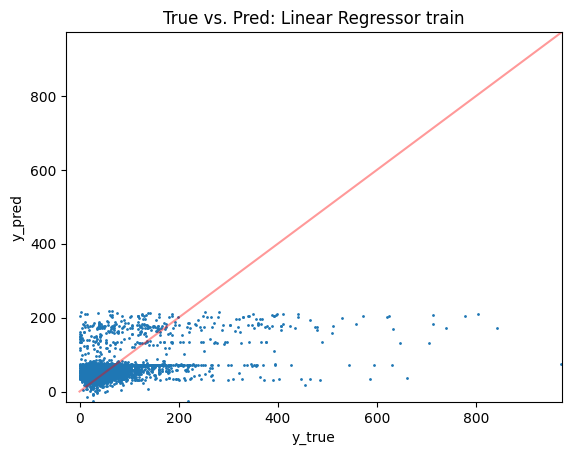

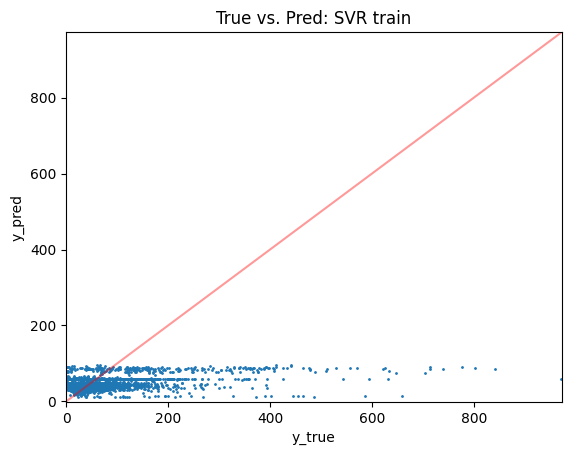

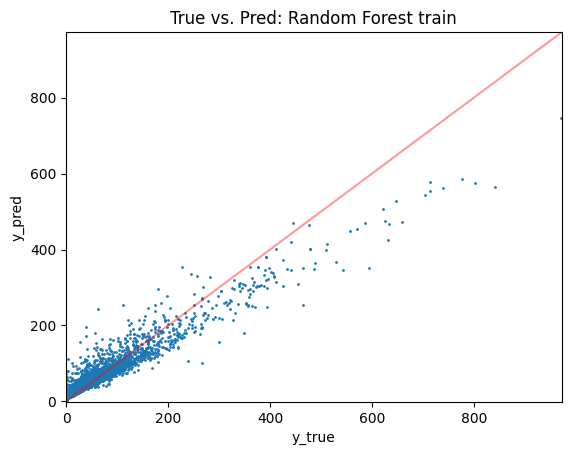

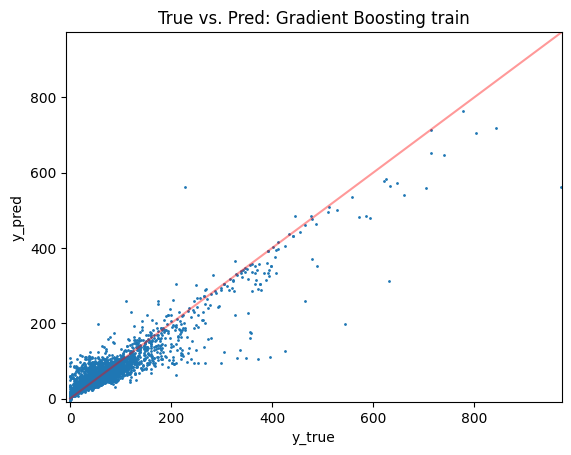

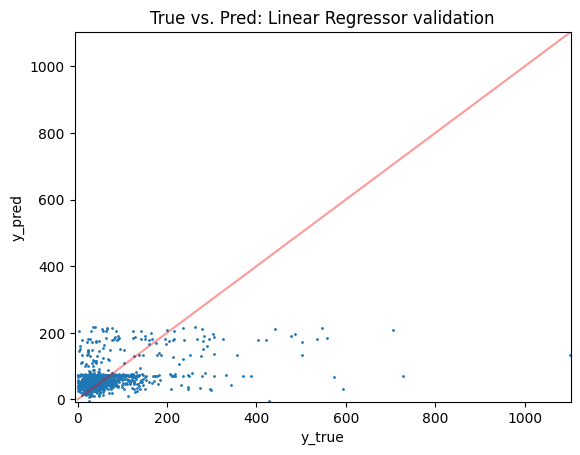

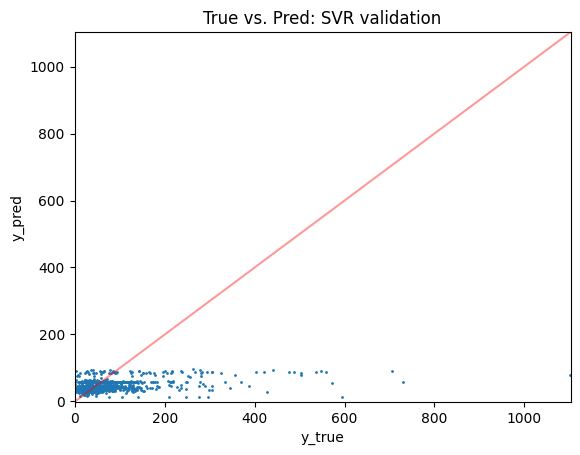

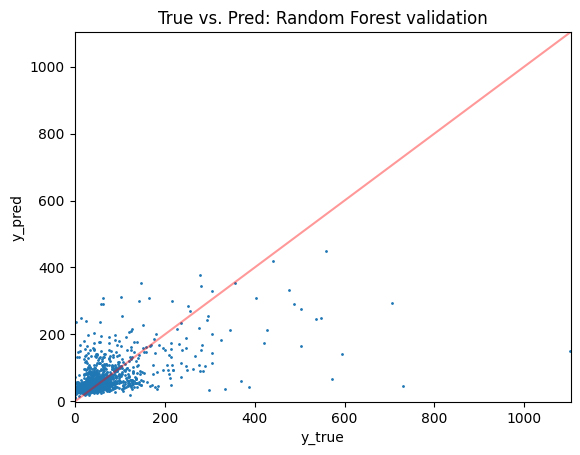

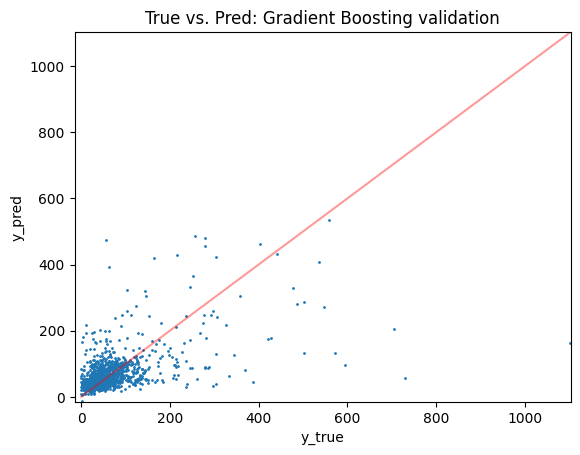

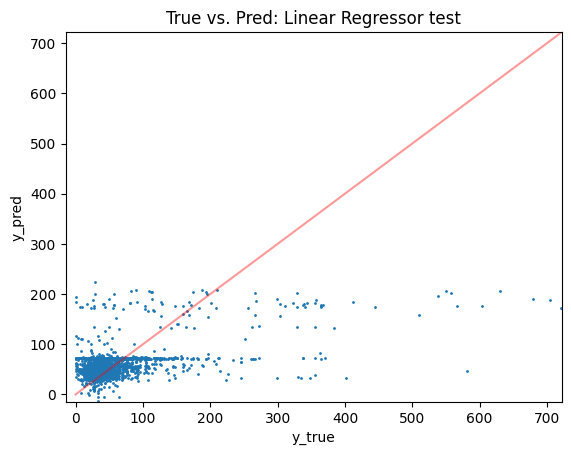

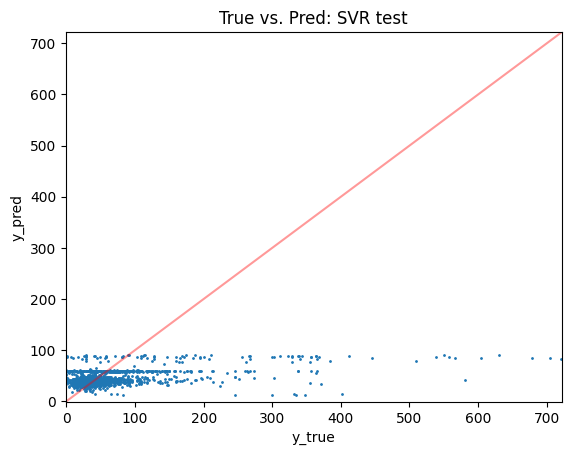

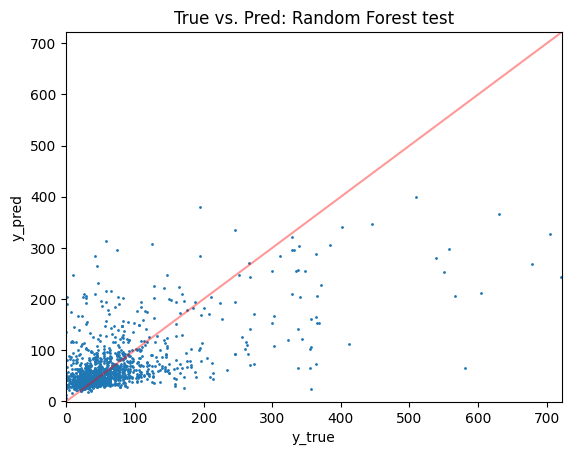

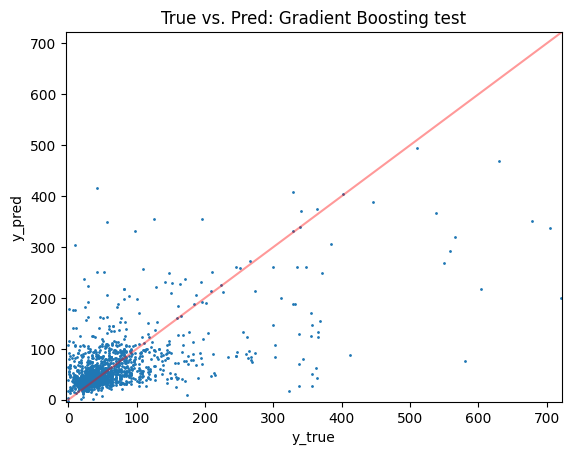

In [8]:
for item in evaluation:
    for model_name, model_instance in MLA:
        plot.predicitons_scatter(results_pred[model_name], evaluation=item,name="All_FS_rfe",y_true_max=None, s=1)

## Histogramm Residuen

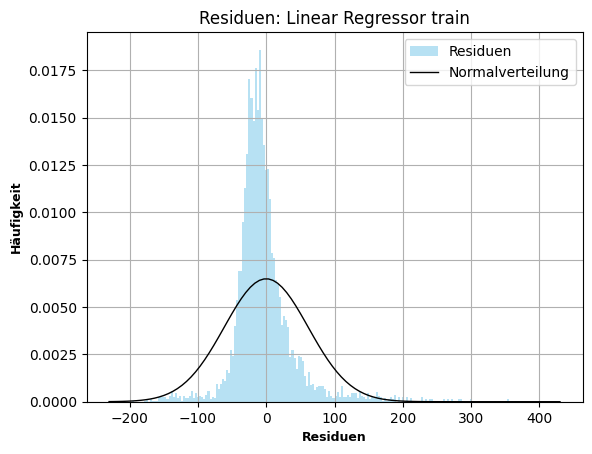

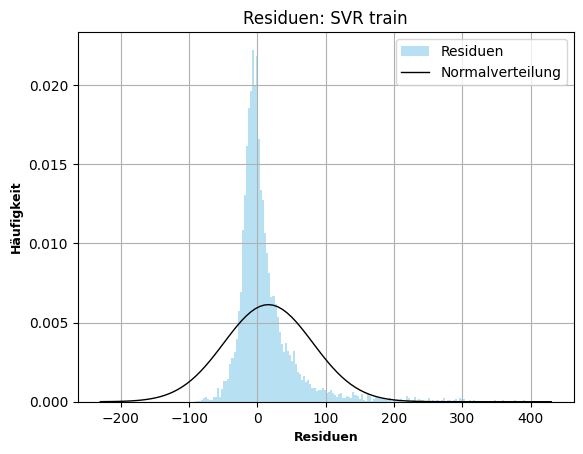

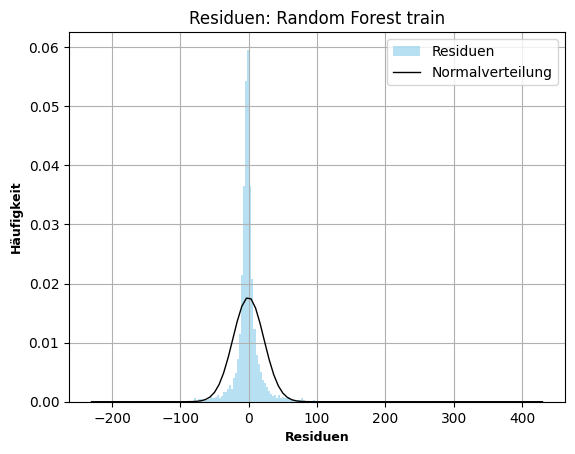

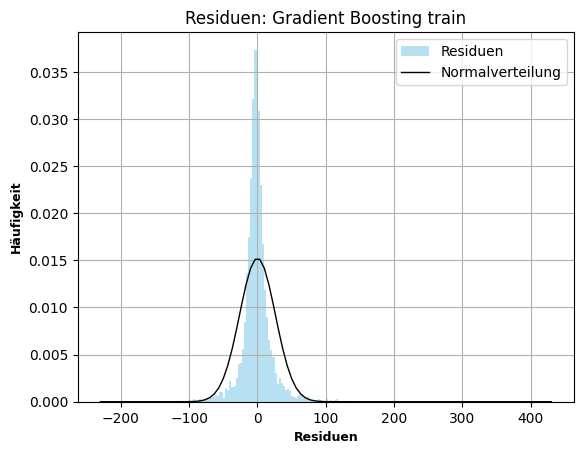

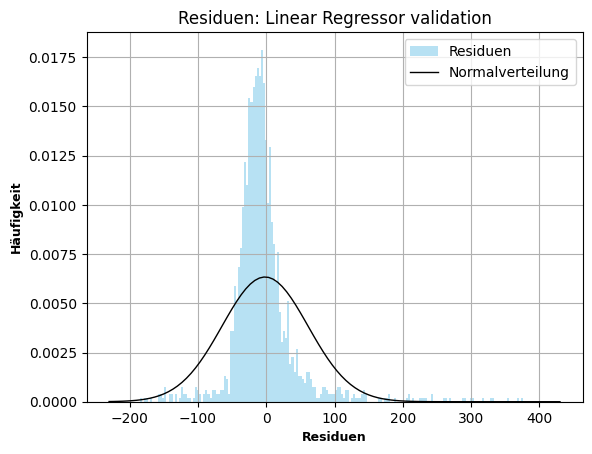

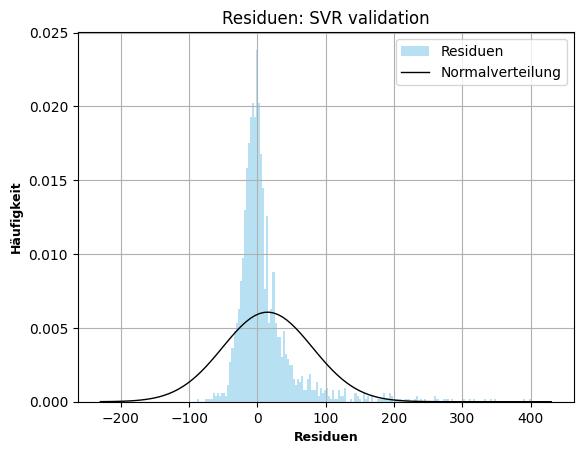

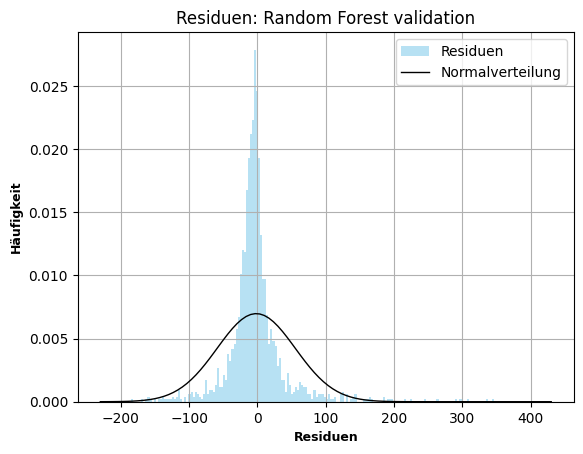

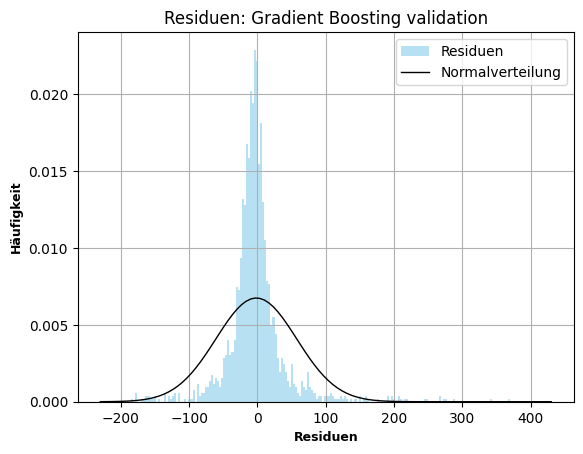

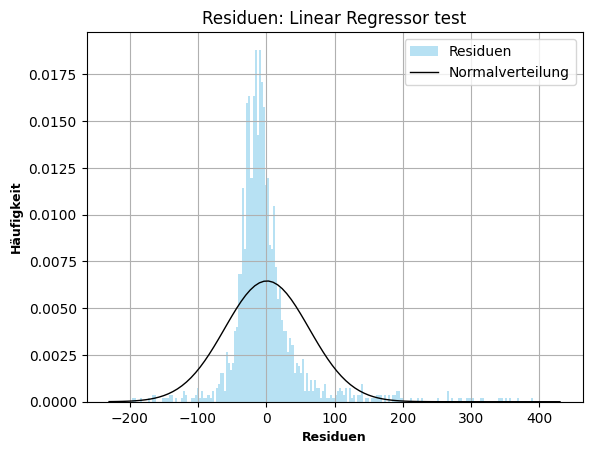

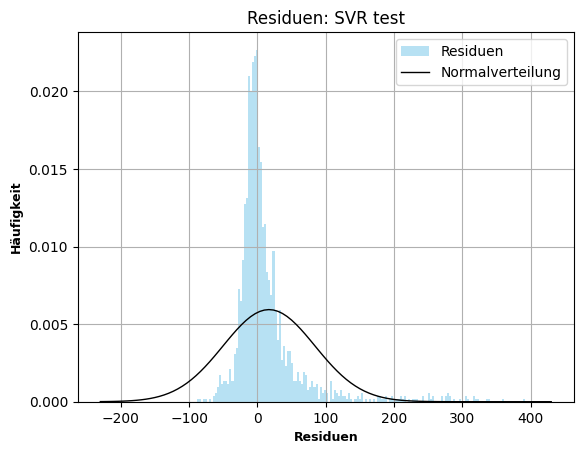

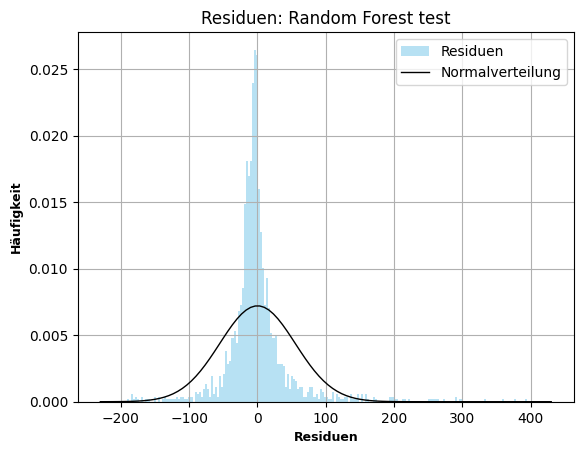

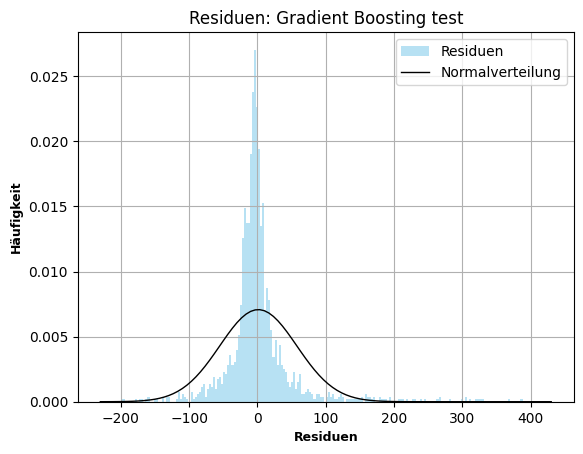

In [9]:
for item in evaluation:
    for model_name, model_instance in MLA:
        plot.residuen_histo(results_pred[model_name], evaluation=item, name="All_FS_rfe", range_min=-200, range_max=400)

## Barplots Metrics

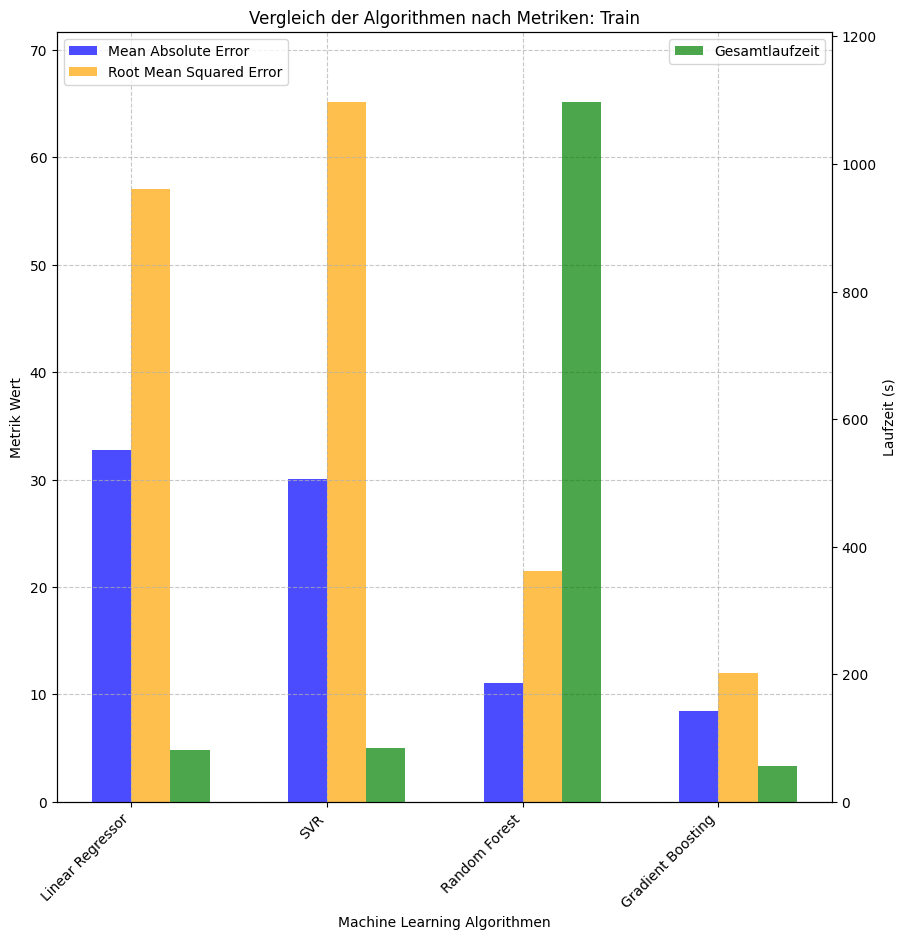

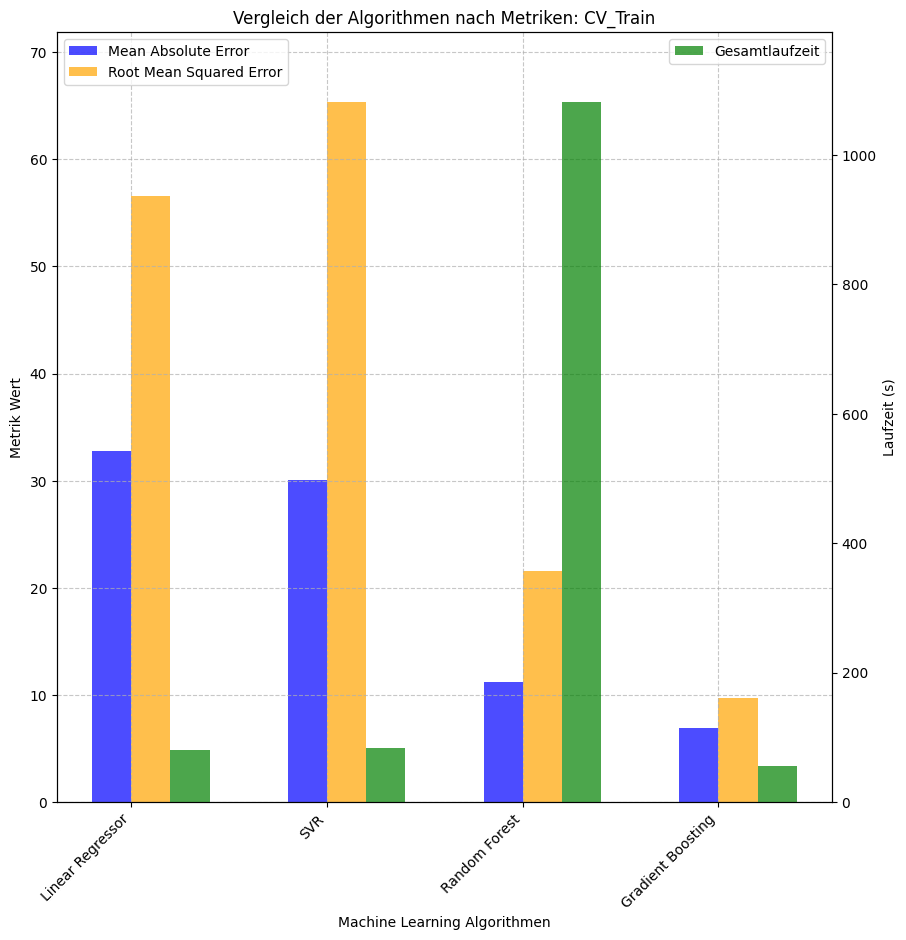

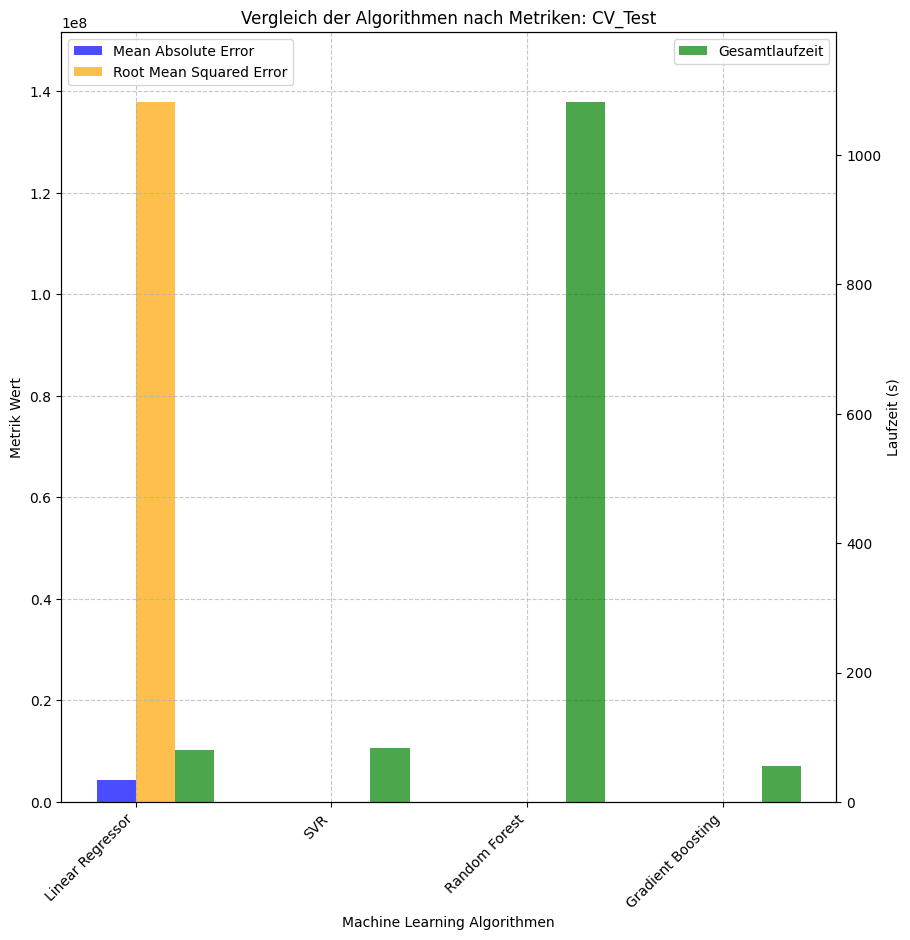

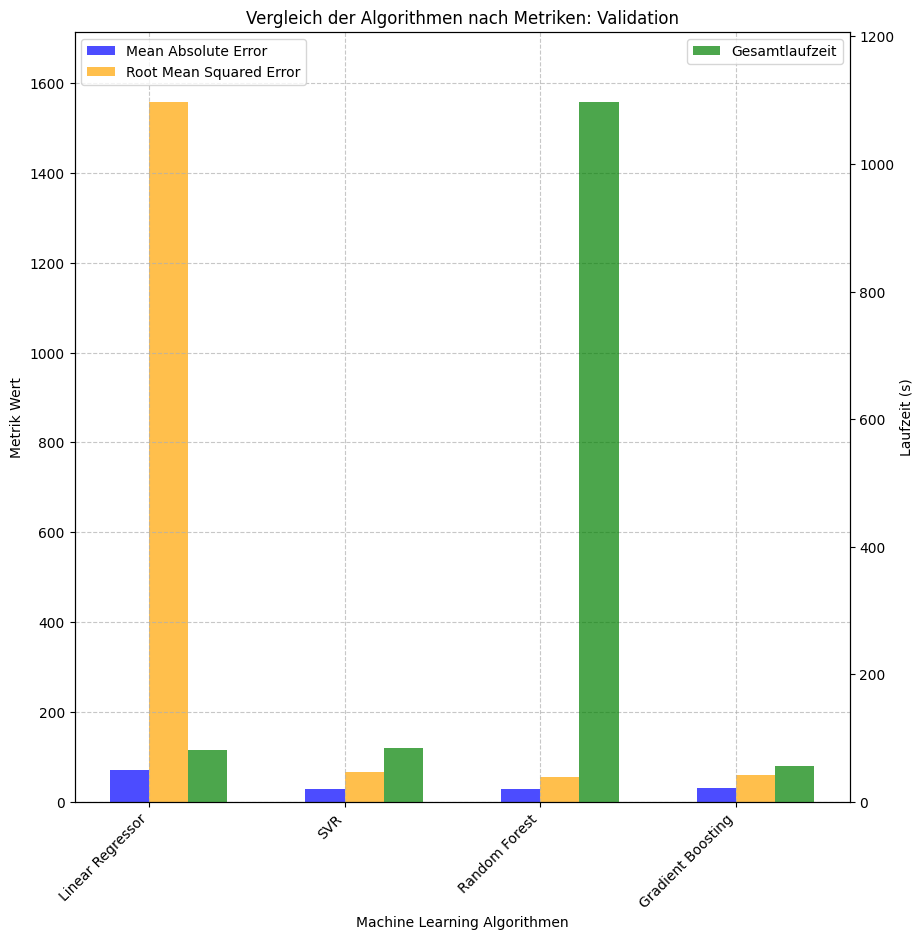

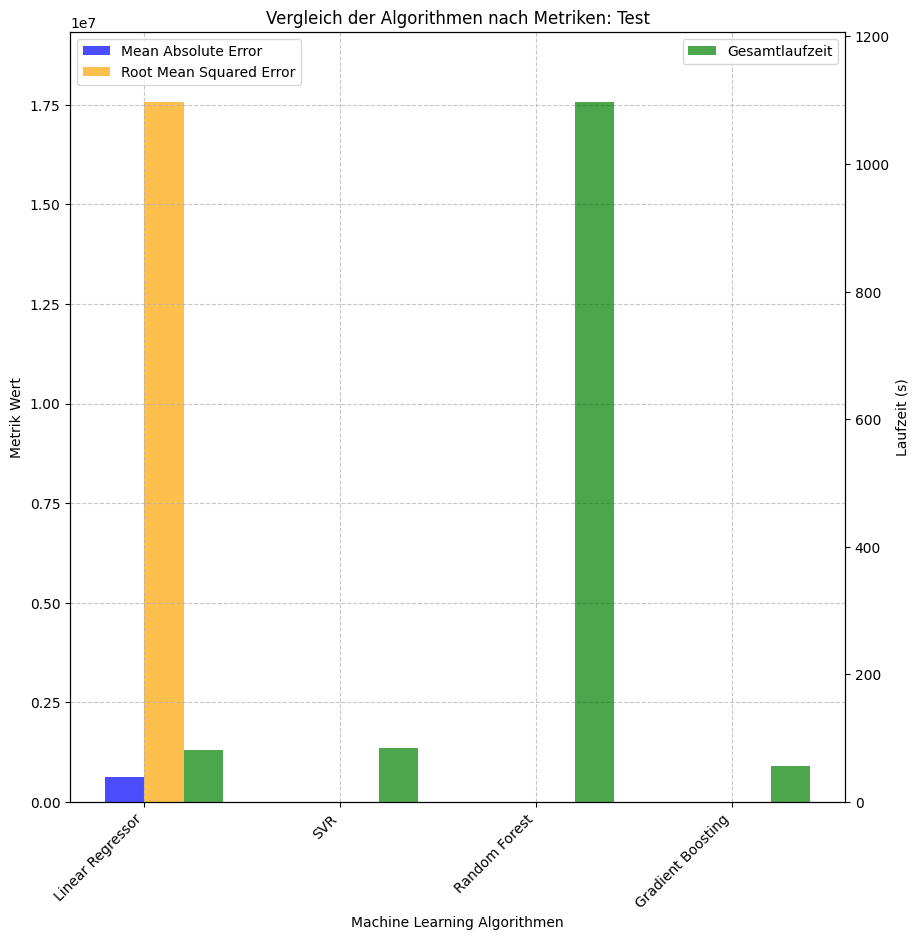

In [10]:
for item in evaluation:
    plot.model_results_barplot(results_metrics, metrics_upper_limit=None, runtime_upper_limit=None, plot_runtime=True, evaluation=item,name="All_FS_rfe")

# Tree Importance

In [2]:
import pandas as pd
import numpy as np

from src import plot

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

In [ ]:
df_metris = pd.read_csv("data/Feature Importance Random Forest/30_FS_RF_metrics.csv")
df_metris.set_index('Model_name', inplace=True)
results_metrics = df_metris.to_dict(orient="index")


restored_df = pd.read_csv('data/Feature Importance Random Forest/30_FS_RF_predictions.csv')
restored_predictions = {}

# Iteriere über die einzigartigen Modellnamen im DataFrame
for model_name in restored_df['Model_name'].unique():
    model_data = {}
    model_df = restored_df[restored_df['Model_name'] == model_name]
    # Iteriere über die einzigartigen Datentypen im Modell
    for data_type in model_df['Data_type'].unique():
        values = model_df[model_df['Data_type'] == data_type]['Value'].values
        # Füge die Werte zum Modelldaten-Dictionary hinzu
        model_data[data_type] = values
    # Füge das Modelldaten-Dictionary zum Hauptdictionary hinzu
    restored_predictions[model_name] = model_data
results_pred = {model_name: {**{'Model_name': model_name}, **model_data} for model_name, model_data in restored_predictions.items()}

evaluation = ['train', 'cv_train', 'cv_test', 'test']

MLA = [
    ('Linear Regressor',LinearRegression()),
    ('SVR', SVR(kernel='linear')),
    ('Random Forest',RandomForestRegressor()),
    ('Gradient Boosting', xgb.XGBRegressor())
]

selection_methode = "FS_Random Forest"

## Metriken vs. Feature Anzahl

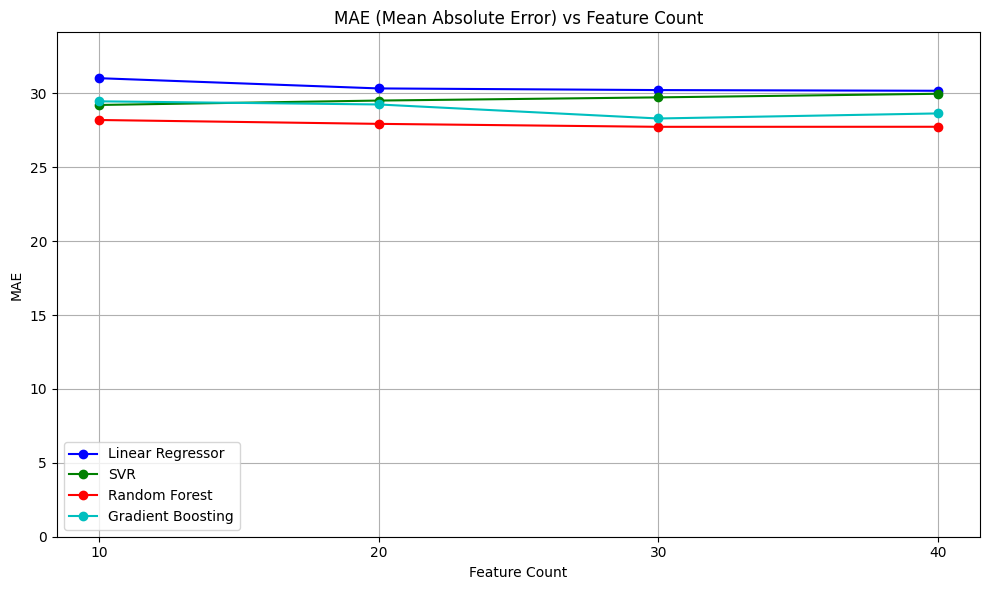

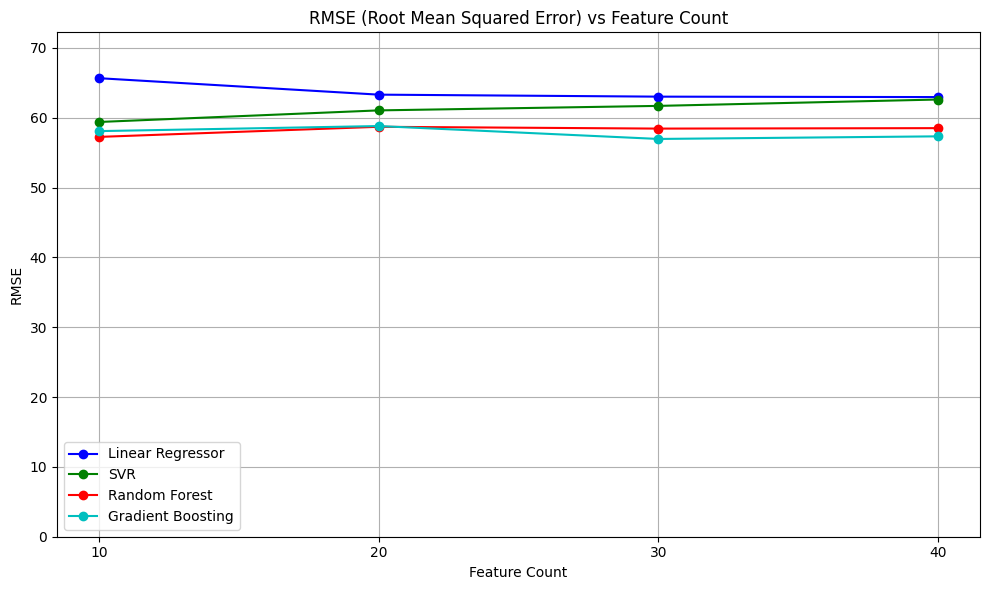

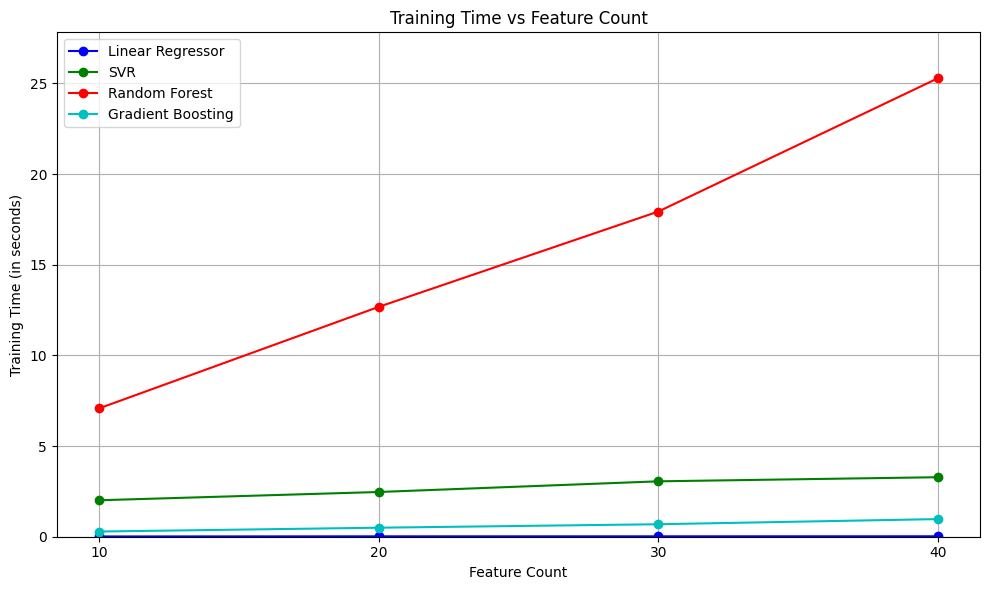

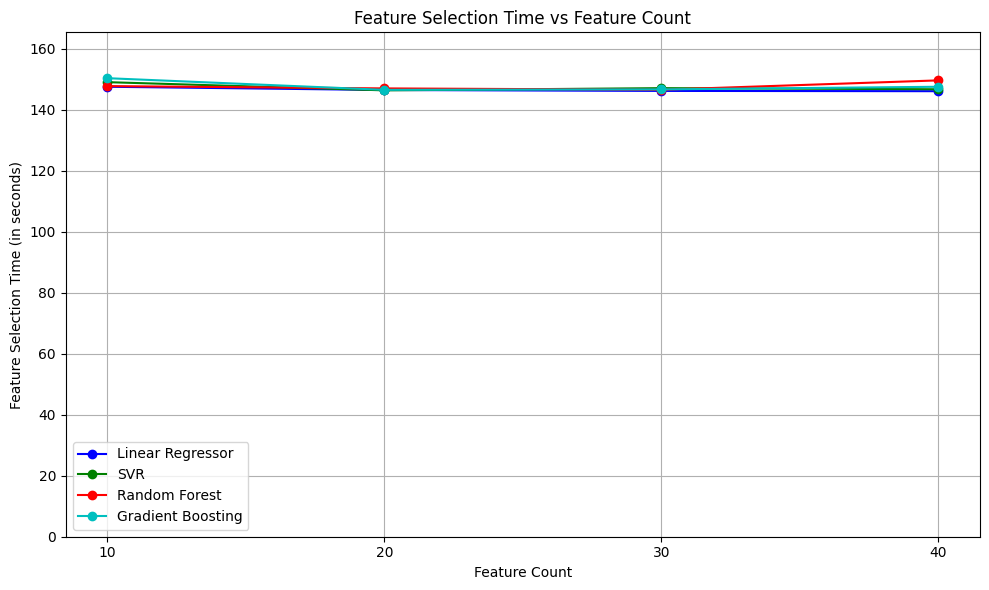

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Verzeichnis mit den gespeicherten Ergebnissen
output_dir = "data/Feature Importance Random Forest/"
save_path = "plots/Feature Importance Random Forest"

# Sicherstellen, dass der Ordner existiert, andernfalls erstellen
os.makedirs(save_path, exist_ok=True)

# Modellnamen und Farben für den Plot
models = ['Linear Regressor', 'SVR', 'Random Forest', 'Gradient Boosting']
colors = ['b', 'g', 'r', 'c']  # Farben für Modelle

# Listen, um die Metriken zu speichern
mae_values = {model: [] for model in models}
rmse_values = {model: [] for model in models}
train_time_values = {model: [] for model in models}  # Liste für Laufzeit
fs_time_values = {model: [] for model in models}  # Liste für Feature Selection Laufzeit
feature_counts = [10, 20, 30, 40]

# Iteriere über jede Feature-Anzahl und extrahiere die Metriken aus den CSV-Dateien
for num_features in feature_counts:
    # Pfad zur Metrik-Datei
    metrics_file = f'{output_dir}{num_features}_FS_RF_metrics.csv'
    
    # Lese die Metriken ein
    df_metrics = pd.read_csv(metrics_file)
    
    # Extrahiere die MAE, RMSE, Laufzeit und Feature Selection Laufzeit Werte für jedes Modell
    for model in models:
        mae_values[model].append(df_metrics.loc[df_metrics['Model_name'] == model, 'TestMAE'].values[0])
        rmse_values[model].append(df_metrics.loc[df_metrics['Model_name'] == model, 'TestRMSE'].values[0])
        train_time_values[model].append(df_metrics.loc[df_metrics['Model_name'] == model, 'TrainTime_ges'].values[0])  # Laufzeit
        fs_time_values[model].append(df_metrics.loc[df_metrics['Model_name'] == model, 'FS-Laufzeit'].values[0])  # FS Laufzeit

# Berechne den maximalen Wert für die Metriken MAE, RMSE, Laufzeit und FS Laufzeit, um die y-Achse dynamisch anzupassen
max_mae = max(max(mae_values[model]) for model in models)
max_rmse = max(max(rmse_values[model]) for model in models)
max_train_time = max(max(train_time_values[model]) for model in models)
max_fs_time = max(max(fs_time_values[model]) for model in models)

# Plot MAE
plt.figure(figsize=(10, 6))
for model, color in zip(models, colors):
    plt.plot(feature_counts, mae_values[model], label=model, color=color, marker='o')

# Achsen und Titel setzen
plt.title('MAE (Mean Absolute Error) vs Feature Count')
plt.xlabel('Feature Count')
plt.ylabel('MAE')
plt.xticks(feature_counts)
plt.ylim(0, max_mae * 1.1)  # Setze die y-Achse bei 0, mit etwas Platz über dem höchsten Wert
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'mae_vs_feature_count.png'))
plt.show()

# Plot RMSE
plt.figure(figsize=(10, 6))
for model, color in zip(models, colors):
    plt.plot(feature_counts, rmse_values[model], label=model, color=color, marker='o')

# Achsen und Titel setzen
plt.title('RMSE (Root Mean Squared Error) vs Feature Count')
plt.xlabel('Feature Count')
plt.ylabel('RMSE')
plt.xticks(feature_counts)
plt.ylim(0, max_rmse * 1.1)  # Setze die y-Achse bei 0, mit etwas Platz über dem höchsten Wert
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'rmse_vs_feature_count.png'))
plt.show()

# Plot Laufzeit
plt.figure(figsize=(10, 6))
for model, color in zip(models, colors):
    plt.plot(feature_counts, train_time_values[model], label=model, color=color, marker='o')

# Achsen und Titel setzen
plt.title('Training Time vs Feature Count')
plt.xlabel('Feature Count')
plt.ylabel('Training Time (in seconds)')
plt.xticks(feature_counts)
plt.ylim(0, max_train_time * 1.1)  # Setze die y-Achse bei 0, mit etwas Platz über dem höchsten Wert
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'train_time_vs_feature_count.png'))
plt.show()

# Plot Feature Selection Laufzeit
plt.figure(figsize=(10, 6))
for model, color in zip(models, colors):
    plt.plot(feature_counts, fs_time_values[model], label=model, color=color, marker='o')

# Achsen und Titel setzen
plt.title('Feature Selection Time vs Feature Count')
plt.xlabel('Feature Count')
plt.ylabel('Feature Selection Time (in seconds)')
plt.xticks(feature_counts)
plt.ylim(0, max_fs_time * 1.1)  # Setze die y-Achse bei 0, mit etwas Platz über dem höchsten Wert
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'fs_time_vs_feature_count.png'))
plt.show()

## Scatterplots

In [ ]:
for item in evaluation:
    for model_name, model_instance in MLA:
        plot.predicitons_scatter(selection_methode, results_pred[model_name], evaluation=item,name="FS_RandomForest")